# Transfer Learning in Image CLassification

In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand

In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow_hub\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [42]:
print(tf.__version__)

2.19.0


In [2]:
IMAGE_SHAPE = (224, 224)
import tf_keras
classifier = tf_keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

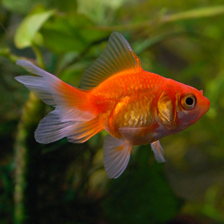

In [5]:
gold_fish=Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [6]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [7]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [8]:
result=classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 500ms/step


(1, 1001)

In [9]:
predicted_label_index=np.argmax(result)
predicted_label_index

np.int64(2)

In [11]:
image_labels=[]
with open("ImageNetLabels.txt", "r") as f:
    image_labels=f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

#### Load flowers Dataset

In [12]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [15]:
import pathlib
data_dir = pathlib.Path('./datasets/flower_photos/flower_photos')
data_dir

WindowsPath('datasets/flower_photos/flower_photos')

In [16]:
list(data_dir.glob('*/*.jpg'))[:5]


[WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [17]:
image_count= len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [20]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

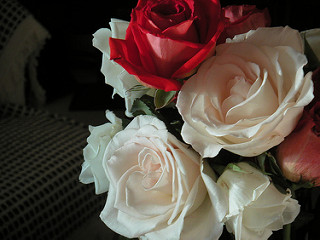

In [21]:
import PIL
PIL.Image.open(str(roses[1]))


In [22]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [23]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [24]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [25]:
img.shape

(240, 179, 3)

In [26]:
cv2.resize(img, (224, 224)).shape

(224, 224, 3)

In [27]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [28]:
X=np.array(X)
y=np.array(y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [30]:
X_train_scaled= X_train / 255.0
X_test_scaled= X_test / 255.0

In [31]:
X[0].shape 

(224, 224, 3)

In [32]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

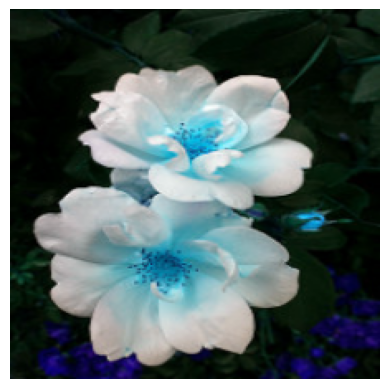

In [33]:
plt.axis('off')
plt.imshow(X[0])

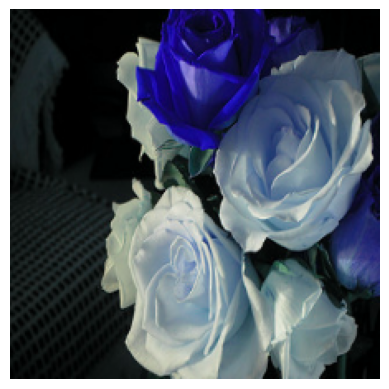

In [34]:
plt.axis('off')
plt.imshow(X[1])

In [35]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 297ms/step


array([795, 880, 795])

In [37]:
image_labels[880]

'umbrella'

#### Now take pre-trained model and retrain it using flowers images


In [ ]:
feature_extractor_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)
#trainable false means that we will not train the weights of this layer

In [40]:
num_of_flowers=5
model=tf_keras.Sequential([
    pretrained_model_without_top_layer,
    tf_keras.layers.Dense(num_of_flowers)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [41]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5



86/86 [==============================] - 9s 88ms/step - loss: 0.8143 - acc: 0.6831
Epoch 2/5
86/86 [==============================] - 8s 89ms/step - loss: 0.4040 - acc: 0.8536
Epoch 3/5
86/86 [==============================] - 8s 88ms/step - loss: 0.3169 - acc: 0.8957
Epoch 4/5
86/86 [==============================] - 8s 90ms/step - loss: 0.2627 - acc: 0.9161
Epoch 5/5
86/86 [==============================] - 8s 88ms/step - loss: 0.2279 - acc: 0.9342


In [43]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 3s 89ms/step - loss: 0.3645 - acc: 0.8671


[0.3644554018974304, 0.8671023845672607]